In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('creditcard.csv', low_memory=False)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
from sklearn.model_selection import train_test_split
from time import time

from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [59]:
X = df.iloc[:,:-1]
y = df['Class']

X_scaled = scale(X)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size = 0.3, random_state=500)

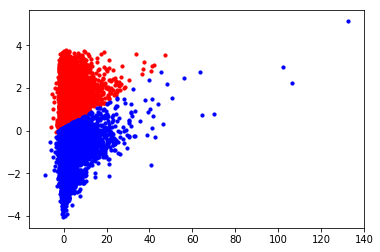

In [8]:
y_kmeans=knn.fit_predict(X_reduced)
plt.scatter(X_reduced[y_kmeans==0,0],X_reduced[y_kmeans==0,1],s=10,c='red',label='NotFraud')
plt.scatter(X_reduced[y_kmeans==1,0],X_reduced[y_kmeans==1,1],s=10,c='blue',label='Fraud')

plt.show()

In [60]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
print(knn.score(X_test,y_test))

0.9982723445197855


In [57]:
predictions = knn.predict(X_test)

pred_fraud = np.where(predictions == 1)[0]
real_fraud = np.where(y_test == 1)[0]
false_pos = len(np.setdiff1d(pred_fraud, real_fraud))

pred_good = np.where(predictions == 0)[0]
real_good = np.where(y_test == 0)[0]
false_neg = len(np.setdiff1d(pred_good, real_good))

#false_neg_rate = false_neg/(false_pos+false_neg)

accuracy = (len(X_test) - (false_neg + false_pos)) / len(X_test)
print("Accuracy:", accuracy)
print("False negative rate (with respect to misclassifications): ", false_neg_rate)
print("False negative rate (with respect to all the data): ", false_neg / len(predictions))
print("False negatives, false positives, mispredictions:", false_neg, false_pos, false_neg + false_pos)
print("Total test data points:", len(X_test))

Accuracy: 1.0
False negative rate (with respect to misclassifications):  1.0
False negative rate (with respect to all the data):  0.0
False negatives, false positives, mispredictions: 0 0 0
Total test data points: 3


In [23]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [16]:
predictions = knn.predict(X_test)

pred_fraud = np.where(predictions == 1)[0]
real_fraud = np.where(y_test == 1)[0]
false_pos = len(np.setdiff1d(pred_fraud, real_fraud))

pred_good = np.where(predictions == 0)[0]
real_good = np.where(y_test == 0)[0]
false_neg = len(np.setdiff1d(pred_good, real_good))

false_neg_rate = false_neg/(false_pos+false_neg)

accuracy = (len(X_test) - (false_neg + false_pos)) / len(X_test)
print("Accuracy:", accuracy)
print("False negative rate (with respect to misclassifications): ", false_neg_rate)
print("False negative rate (with respect to all the data): ", false_neg / len(predictions))
print("False negatives, false positives, mispredictions:", false_neg, false_pos, false_neg + false_pos)
print("Total test data points:", len(X_test))

Accuracy: 0.9982657175992424
False negative rate (with respect to misclassifications):  0.9877300613496932
False negative rate (with respect to all the data):  0.0017130028620979498
False negatives, false positives, mispredictions: 161 2 163
Total test data points: 93987


In [17]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [18]:
predictions = knn.predict(X_test)

pred_fraud = np.where(predictions == 1)[0]
real_fraud = np.where(y_test == 1)[0]
false_pos = len(np.setdiff1d(pred_fraud, real_fraud))

pred_good = np.where(predictions == 0)[0]
real_good = np.where(y_test == 0)[0]
false_neg = len(np.setdiff1d(pred_good, real_good))

false_neg_rate = false_neg/(false_pos+false_neg)

accuracy = (len(X_test) - (false_neg + false_pos)) / len(X_test)
print("Accuracy:", accuracy)
print("False negative rate (with respect to misclassifications): ", false_neg_rate)
print("False negative rate (with respect to all the data): ", false_neg / len(predictions))
print("False negatives, false positives, mispredictions:", false_neg, false_pos, false_neg + false_pos)
print("Total test data points:", len(X_test))

Accuracy: 0.998233798291253
False negative rate (with respect to misclassifications):  1.0
False negative rate (with respect to all the data):  0.0017662017087469544
False negatives, false positives, mispredictions: 166 0 166
Total test data points: 93987
